# K-Means Clustering

In [0]:
# Imports
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

,x,y
0,1,2
1,2,2
2,3,2
3,4,2
4,2,1
5,3,1
6,2,3
7,3,3
8,6,7
9,7,7


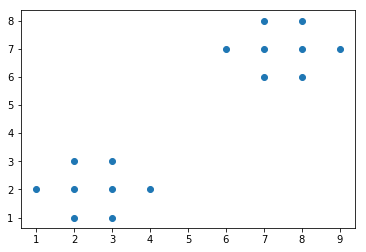

In [62]:
# Let's consider a hypothetical dataset with only 2 dimensions 
# This can be easily be plotted on a graph for readibility as the points represent 
# coordinates on a 2D grid
data = {
    'x': [1,2,3,4,2,3,2,3,6,7,8,9,7,8,7,8],
    'y': [2,2,2,2,1,1,3,3,7,7,7,7,6,6,8,8]
}
  
# Store the data into a dataframe as this is the requested parameter for the
# KMeans function
df = DataFrame(data, columns=['x','y'])
plt.scatter(df['x'], df['y'])
df

## Algorithm usage
Now that we have a dataset to work with, we can run the K-Means algorithm and see how the data gets represented.

###To Do:
- Use scikit-learn's [K-Means algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) on the dataframe with 2 clusters
- Get the cluster centers
- Plot the data and the centroids on a graph

In [0]:
# TODO: Have a look at the documentation and set the number of clusters to 2.
kmeans = KMeans(2)
kmeans.fit(df)

# TODO: Get the cluster centers and store them in a new variable
# Hint: look at the docs
centroids = kmeans.cluster_centers_

Plot this data on a 2D graph like above but colour code each cluster.  Also plot the cluster centers on the same graph as red.  Use  [matplotlib](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html).

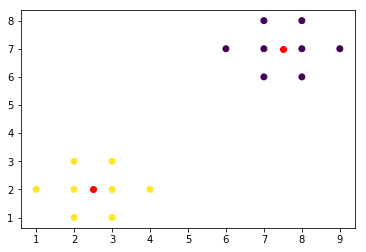

In [7]:
# TODO: Plot the data on a 2D graph as above and plot the centroids red:
plt.scatter(df['x'], df['y'], c=kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], color = 'r')

In [20]:
# Print the labels created by the algorithm
print(kmeans.labels_)

# Now let us consider a few new points and see in what 
# cluster they will be assigned to
coordinates = [[1,5],[4,4],[6,2],[7,6],[6,8],[3,6]]
coordinates_tr = np.transpose(coordinates)
coordinates_tr[0]

[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]


array([1, 4, 6, 7, 6, 3])

###Question: 
What does the `transpose` function do?

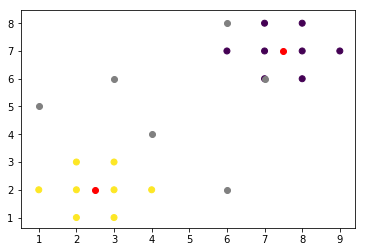

In [14]:
# TODO: Plot the same graph as before but with the new coordinates_tr
# datapoints coloured in grey.

plt.scatter(df['x'], df['y'], c=kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], color = 'r')
plt.scatter(coordinates_tr[0], coordinates_tr[1], color = 'grey')

In [16]:
# We can also use the kmeans algorithm to predict which cluster the new values should belong
cluster_assignment = kmeans.predict(coordinates)
cluster_assignment

array([1, 1, 1, 0, 0, 1], dtype=int32)

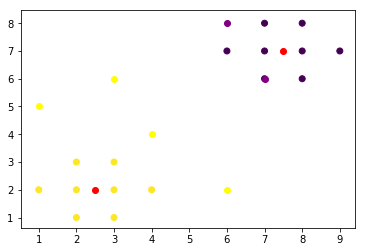

In [22]:
# TODO: Plot the same graph as before but with the new datapoints coloured by 
# their cluster_assignment

plt.scatter(df['x'], df['y'], c=kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], color = 'r')

for i in range(len(cluster_assignment)):
  if cluster_assignment[i] == 1:
    plt.scatter(coordinates_tr[0,i], coordinates_tr[1, i], color = 'yellow')
  else:
    plt.scatter(coordinates_tr[0,i], coordinates_tr[1, i], color = 'purple')

## Real Data
So far we have worked with hypothetical data as an overview of how the K-Means algorithm works.

In clustering problems, the data is unlabelled and in general very noisy. Because of that, choosing the number of clusters is not as intuitive as in our example above and usually comes down to trial and error in order to find a satisfying value that best represents the data.

All classification problems can be transformed into clustering problems as long as we remove the label column provided. Let's have a look at a real dataset about cars and how we can cluster the data to recreate the labels.

###TODO:
- Load the dataset
- Inspect the contents

In [0]:
# TODO: Load the dataset into a Pandas dataframe
url = 'https://aicamp2019.s3.amazonaws.com/cars.csv'
df = pd.read_csv(url)

In [99]:
# TODO: Look at the top 5 records in this dataframe
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


# Columns of the dataset

|Attribute | Discription|
|---|---|
|mpg | Miles Per Gallon: a measure of how far a car can travel if you put just one gallon of petrol or diesel in its tank.|
|cylinders|A cylinder is the power unit of an engine; it's the chamber where the gasoline is burned and turned into power| 
|cubicinches|Volume of a cube with each of its three dimensions (length, width, and depth) being one inch long|
|hp|horsepower|
|weightlbs|the weight of the car in lbs|
|time-to-60|how fast can it get to 60 miles per hour|
|year|the year the car was manufactured in|
|brand|where does the car come from|

Remove the brand column because we do not need it, and deal with empty/null values.

###TODO:
- Remove the `brand` column
- Remove any empty/null values

In [100]:
# TODO: Remove the brand column from the dataset
df = df.drop([' brand'], axis = 1)

df.head(5)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978


In [101]:
# TODO: Check if any of the rows in the dataset contains any 
# null values and fill them with a value
df.ffill()

cols = df[['mpg', ' hp']]
cols1 = np.asarray(cols)
cols

,mpg,hp
0,14.0,165
1,31.9,71
2,17.0,140
3,15.0,150
4,30.5,63
5,23.0,125
6,13.0,158
7,14.0,215
8,25.4,77
9,37.7,62


We already know that in the original dataset, there were 3 labels: 
* US
* Japan
* Europe

Therefore, the number of clusters needs to be 3.

### TODO
1. Cluster the data
2. Plot mpg and hp on a graph with the centroids in red
3. Try some other features to see if there are any interesting trends

In [103]:
centroids
i = df.columns.get_loc(' hp')
print(i)

3


IndexError: ignored

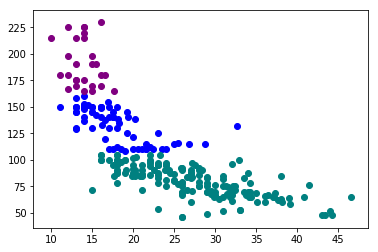

In [105]:
kmeans = KMeans(3)
kmeans.fit(cols1)
X=df
y = kmeans.labels_
centroids = kmeans.cluster_centers_

# Because the data is multi-dimensional, plotting it makes it more complicated.
# We will choose only two features and plot the datapoints as we did with our first
# example on a 2D graph.
def plot_graph(X, y, x_axis, y_axis, centroids):
    i = df.columns.get_loc(x_axis)
    j = df.columns.get_loc(y_axis)
    plt.scatter(X[y==0][x_axis], X[y==0][y_axis], label='US', c='blue')
    plt.scatter(X[y==1][x_axis], X[y==1][y_axis], label='Japan', c='teal')
    plt.scatter(X[y==2][x_axis], X[y==2][y_axis], label='Europe', c='purple')
    plt.scatter(centroids[:, i], centroids[:, j], c='red')
    
    plt.legend()
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)

plot_graph(X, y, 'mpg', ' hp', centroids)

Now let us consider the brands column which we dropped from the `X` variable.  Select it from the original `df` object and encode it as a numeric.

In [0]:
# TODO: Get the labels from the original dataframe


# TODO: Transform the brand names to categorical values


In [0]:
# TODO: Now that we have the labels in numeric format, we can use the 
# `plot_graph` function to see how the data is actually represented


In [0]:
# We already know what label the data should have. 
# TODO: Calculate the accuracy of the algorithm, I.E. Compare the labels with 
# the y(predictions)


## Poor accuracy
As you can see, the accuracy is not very high. You should remember that k-means is not a classification tool and should not be used for this purpose. However, since we already have the labels, we compared the formed clusters with the original data to see the difference. 

## Full implementation
Here is the full implementation of the k-means algorithm for those who are interested of the inner workings. However, it is in general recommended to use the libraries for maximum efficiency and stability.






In [0]:
# The algorithm translated into Python code might look like this. Then we just need to implement each of the functions.
def k_means(data, k, max_iterations):
    centres = get_initial_centres(data, k)
    
    for i in range(0, max_iterations):
        cluster_assignment = assign_clusters(data, centres) # will pass back array of the clusters for each datapoint
        new_centres = revise_centres(data, cluster_assignment, k) # returns 3 new centres 
        if np.array_equal(new_centres, centres): # check if the centres are equal if they are break out 
            break
        centres = new_centres # new centres is assigned to centres variable
    return cluster_assignment

In [0]:
# Should take the data and number of clusters (k) as input, return k random values from the data
def get_initial_centres(data, k):
    data_points = data.copy() # need a copy because we want to isolated the shuffling to inside the function
    np.random.shuffle(data_points) # shuffle the points to create the random data centres
    return data_points[:k]

In [0]:
from scipy.spatial import distance # cluster assignment

# Should take the data and the k centres and return an np array with a cluster assignment for each data point
def assign_clusters(data, centres):
    num_data_points = data.shape[0] # there are 1599 rows and 2 columns and the [0] just assigns the number to 150 

    cluster_assignment = np.zeros(shape=(num_data_points, 1)) # creates an 1D array with 150 zeros; cannot append np array

    for i in range(0, num_data_points):
        distances = [] # recording the distances between the current data point and the centres
        for j in range(0, centres.shape[0]):
            distances.append(distance.sqeuclidean(data[i], centres[j]))
        cluster_assignment[i] = distances.index(min(distances)) # using min will give us the smallest value of the 
    # distance list and gives the index of that list element, value will be 0,1 or 2 an will return that cluster
    # assignment array for the data points

    return cluster_assignment

In [0]:
# Should take the data, cluster assignments and number of clusters and return the point closest to the average for each cluster

def revise_centres(data, cluster_assignment, k):
    revised_centres = np.zeros(shape=(k, data[0].shape[0])) # initalising revised_centres array to an np array of zeros
    # k is the amount of rows in the array and data.shape is the number of columns
    # Get the number of data points in each cluster

    centre_labels, num_in_clusters = np.unique(cluster_assignment, return_counts=True)
    # shows how many of the data points are in each cluster and assigns them to the two variables; uses tuples
    # For each cluster we want to find the average of all the points and find the point closest to that

    for i in range(0, k):
        # Initialise an empty np array where we will store all the data points from cluster i

        this_cluster = np.zeros(shape=(num_in_clusters[i], data[0].shape[0]))
        # np array uses the number of points in a cluster to create the rows
        # We need to keep track of how many data points we have collected for cluster i so far
        data_point_index = 0
        for j in range(0, data.shape[0]):
            if cluster_assignment[j] == centre_labels[i]:
                this_cluster[data_point_index] = data[j]
                data_point_index += 1
        # Now we have collected all data points for this cluster we can calculate the middle/average position
        
        average_position = np.mean(this_cluster, axis=0)
        # axis = 0 averages each column 
        # Calculate the closest point from this cluster to the average position
        
        new_centre = this_cluster[0]
        for j in range(0, num_in_clusters[i]):
            if distance.sqeuclidean(this_cluster[j], average_position) < distance.sqeuclidean(new_centre, average_position):
                new_centre = this_cluster[j]
        revised_centres[i] = new_centre
        # loops through data points and finds the closest to the new centre and returns the new data centres          
    return revised_centres

In [0]:
def k_means(data, k, max_iterations):
    centres = get_initial_centres(data, k)
    
    for i in range(0, max_iterations):
        cluster_assignment = assign_clusters(data, centres)
        new_centres = revise_centres(data, cluster_assignment, k)
        if np.array_equal(new_centres, centres):
            break
        centres = new_centres
        
    return cluster_assignment

## New Dataset Exercise
Apply K-means clustering to a new dataset. You can either find one on your own or use the `Wine-Dataset` which can be loaded from the link below.

To Do:
- Load the dataset
- Decide what columns to remove (if any)
- Use the Kmeans function and play with the parameters
- Change the number of clusters until the data looks evenly distributed
- Plot the data on the graph with each datapoint being coloured differently to represent the cluster they belong to

In [0]:
# TODO


## Stretch Exercises
1. Use the implementation of the k_means algorithm from above on the dataset and calculate the accuracy

In [0]:
# TODO


2. Using the functions defined above, find the initial centers of the clusters and display them before running the algorithm. Plot them on a grid with **`mpg`** as x axis and **`hp`** as y axis. Then change the axis with new features and plot again.

In [0]:
# TODO


3. Assign data based off of the centers that we previously found. Use the **`mpg`** and **`hp`** axis for best readibility. Plot each datapoint to it's corresponding cluster.

In [0]:
# TODO


4. Find the optimal center and assign the data accordingly. Plot the new centers initially and then plot the data with each datapoint correctly assigned to the new cluster.

In [0]:
# TODO


In [0]:
url = 'https://aicamp2019.s3.amazonaws.com/winequality-red.csv'
df = ...